# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

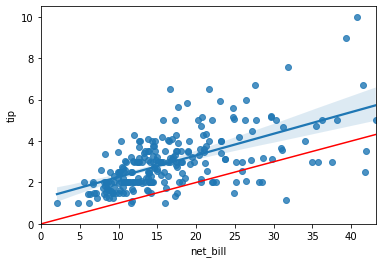

In [3]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

plt.plot(x, y, '-r', label = 'linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

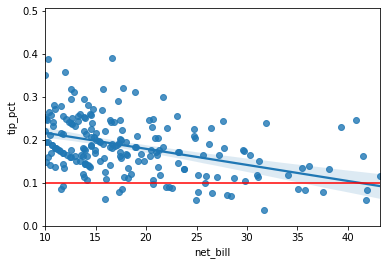

In [4]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * (x ** 0)

plt.plot(x, y, '-r', label = 'linha dos 10%')

plt.xlim(left = 10)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- Bom no primeiro gráfico, ficou evidente, que a cada vez que aumenta o valor do ``net_bill``o valor de tip será maior. Agora no segundo, como estamos analisando o ``tip_pct``que é a porcentagem de tip, então o valor de 10% seria constante. Por este motivo, que no segundo gráfico a linha dos 10% se mantem fixa. Porém notamos também que quanto maior o valor da conta, a porcentagem do tips ou o ``tip_pct``é mais próxima de 10% e em alguns casos, mais baixo que 10%.

In [5]:
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           5.02e-23
Time:                        22:59:08   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.52e-06
Time:                        22:59:08   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Analisando pelo R²s, usando o ``tip`` com o ``net_bill``, aparenta que responde mais ao nosso modelo do que o ``tip_pct`` e ``net_bill``

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [7]:
# 4.1) obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)

pred = reg_tip_pct.fittedvalues

pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [8]:
tips['pred'] = pred * tips['net_bill']


tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998


In [9]:
# 4.2) obtenha o valor predito para tip como tip_pct * net_bill

reg_tip = smf.ols('tip ~ pred + net_bill', data = tips).fit()

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           4.96e-22
Time:                        22:59:08   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0743      0.353      3.039      0.003       0.378       1.770
pred           0.1124      0.136      0.825      0.410      -0.156       0.381
net_bill       0.0945      0.011      8.788      0.000       0.073       0.116
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
pred = reg_tip.fittedvalues

pred

0      2.956872
1      2.140619
2      3.118618
3      3.412297
4      3.473472
         ...   
239    3.683055
240    3.880730
241    3.442447
242    2.966476
243    2.935489
Length: 244, dtype: float64

In [11]:
# 4.3) calcule o  R2  do modelo para tip

reg_tip.rsquared

0.33442160076569494

In [12]:
# 4.4) compare esse  R2  com o do item 1

reg_tip_pct.rsquared

0.09129084920662944

In [13]:
reg_tip.rsquared

0.33442160076569494

- Sobre o R², responde muito mais o nosso modelo agora que nós predizemos e fizemos os cálculos. E tem um MSE menor do que usar somente o ``tip`` e ``net_bill``

In [14]:
print(reg_tip.mse_model)
print(reg_tip.mse_resid)
print(reg_tip.mse_total)

77.78855063548053
1.2847940903660555
1.914454638062471


In [15]:
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()

print(reg_tip.mse_model)
print(reg_tip.mse_resid)
print(reg_tip.mse_total)

154.70209729635695
1.2831007427802623
1.914454638062471
